In [1]:
#What is the maximum flow from staring node to the ending node?
# max G
#such that:
#          for all i: Gi - Li = sum over j (flow(i,j)) 

In [2]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random

In [36]:
model = AbstractModel()
#i represents a set containing all the nodes 0,...,6
model.i = Set(initialize=range(0,7))
#j is alias of i
model.j = Set(initialize=model.i)

model.flow = Var(model.i, model.j, within=NonNegativeReals)
model.cap = Param(model.i, model.j, within=Reals, mutable=True)
#G represents how much we can inject and extract within a node
#G is the objective function
model.G = Var(bounds=(0, 100), within=NonNegativeReals)
#model.OF = Var(within=NonNegativeReals, initialize=0)


def rule_C1(model, i):
    if i==0:
        return model.G == sum(model.flow[i,j] - model.flow[j,i] if i!=j else 0 for j in model.j)
    elif i==6:
        return -model.G == sum(model.flow[i,j] - model.flow[j,i] if i!=j else 0 for j in model.j)
    else:
        return 0 == sum(model.flow[i,j] - model.flow[j,i] if i!=j else 0 for j in model.j)
model.C1 = Constraint(model.i, rule=rule_C1)

def rule_C2(model, i, j):
    if i!=j:
        #without this, solver creates constraints for every pair of i and j 
        #Hence, the solver computes variables for conncetion of a node i with itself
        return model.flow[i,j] <= model.cap[i,j]
    else:
        return Constraint.Skip
model.C2 = Constraint(model.i, model.j, rule=rule_C2)

model.obj1 = Objective(expr=model.G, sense=maximize)
opt=SolverFactory('glpk')

In [37]:
#MaxFlow.dat contains the capacity between each nodes
instance = model.create_instance("MaxFlow.dat")
results = opt.solve(instance) # solves and updates instance
print('OF= ', value(instance.obj1))

OF=  7.0


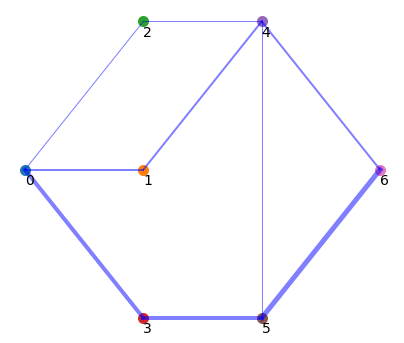

In [39]:
#data is used to plot graph with respect to capacity
data={'0':(1,2),
       '1':(3,2),
     '2':(3,4),
     '3':(3,0),
     '4':(5,4),
     '5':(5,0),
     '6':(7,2)}
fig=plt.figure(figsize=(7,6))

for i in instance.i:
    #print(data[str(i)], data[str(i)][0], data[str(i)][1])
    plt.scatter(data[str(i)][0], data[str(i)][1], s=100)
    plt.text(data[str(i)][0], data[str(i)][1]-0.2, str(i),fontsize=14)
    
    for j in instance.j:
        if (i!=j):
            if value(instance.flow[i,j]>0.001):
                plt.plot([data[str(i)][0], data[str(j)][0]],[data[str(i)][1], data[str(j)][1]],lw=value(instance.flow[i,j]),color='blue',alpha=0.5)
                plt.axis('off')

In [40]:
instance.display()
#Two main variables G and flow


Model unknown

  Variables:
    flow : Size=49, Index=flow_index
        Key    : Lower : Value : Upper : Fixed : Stale : Domain
        (0, 0) :     0 :  None :  None : False :  True : NonNegativeReals
        (0, 1) :     0 :   2.0 :  None : False : False : NonNegativeReals
        (0, 2) :     0 :   1.0 :  None : False : False : NonNegativeReals
        (0, 3) :     0 :   4.0 :  None : False : False : NonNegativeReals
        (0, 4) :     0 :   0.0 :  None : False : False : NonNegativeReals
        (0, 5) :     0 :   0.0 :  None : False : False : NonNegativeReals
        (0, 6) :     0 :   0.0 :  None : False : False : NonNegativeReals
        (1, 0) :     0 :   0.0 :  None : False : False : NonNegativeReals
        (1, 1) :     0 :  None :  None : False :  True : NonNegativeReals
        (1, 2) :     0 :   0.0 :  None : False : False : NonNegativeReals
        (1, 3) :     0 :   0.0 :  None : False : False : NonNegativeReals
        (1, 4) :     0 :   2.0 :  None : False : False : 